<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Code_challenge.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

#Decision Trees Practical
© ExploreAI Academy

## Webinar Outcomes
* Using Decision Trees
* Visualising Decision Tress
* Feature Importance
* Coding Challenge Tips

### Imports

In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/Housing_Price_Data.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

We can't process binary columns with Tree models

In [ ]:
categorical_columns = X.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and apply label encoding
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

X.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
names = ['Decision','Random Forest']
Regressors =[DecisionTreeRegressor(),
             RandomForestRegressor(),]

In [ ]:
results = []
models = {}
for name, reg in zip(names, Regressors):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o reg.fit(X_train, y_train)

    print ('... predicting')
    y_pred = reg.predict(X_test)

    print ('... scoring')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # save the results to dictionaries
    models[name] = reg

    results.append([name, mse, r2, run_time.best])

results = pd.DataFrame(results, columns=['Regressors', 'MSE', "R-Squared", 'Train Time'])
results.set_index('Regressors', inplace= True)

Fitting Decision model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring


### Evaluation

In [ ]:
data = pd.DataFrame(results)
data = data.reset_index()
data.sort_values('R-Squared', ascending=False)

,Regressors,MSE,R-Squared,Train Time
1,Random Forest,1.231146e+12,0.572744,0.197813
0,Decision,2.549612e+12,0.115185,0.002595


### Observation

Label Encoding was not the best choice for all columns. This is deliberate choice to showcase how minor changes effect a model

Smart imputaition yielded an MSE:
* RF - 0.73
* DT - 0.61

The minor change in code completely changed the performance of the DT

## Let's take a closer look at these models

In [ ]:
# New import
from sklearn.tree import plot_tree

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

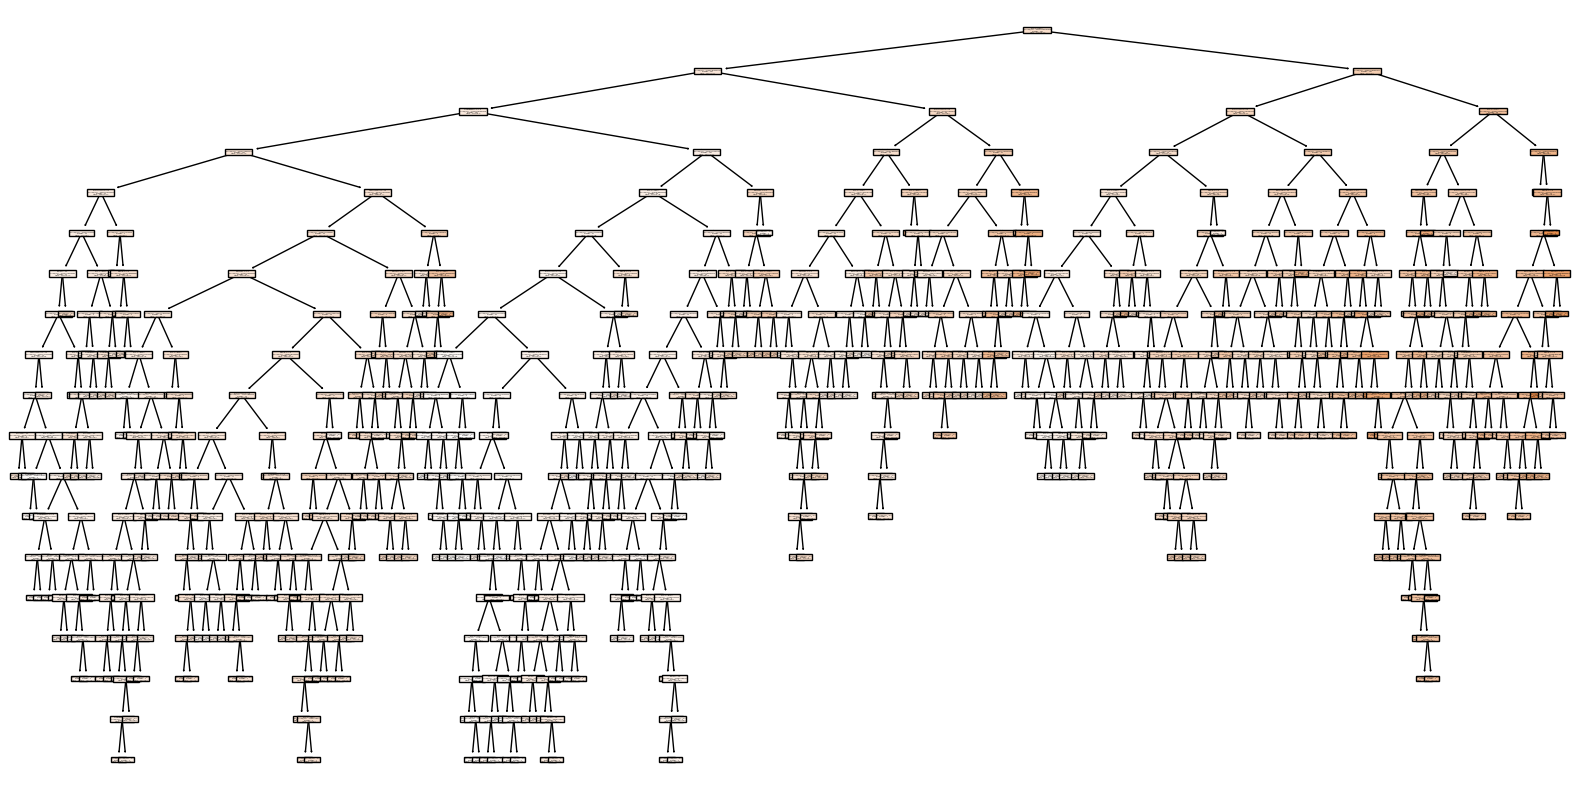

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_train.columns, filled=True)

# Adjust plot limits for zooming
plt.xlim(0, 1000)  # Adjust the x-axis limits as needed
plt.ylim(0, 500)   # Adjust the y-axis limits as needed
plt.show()

In [ ]:
feature_importance = dt.feature_importances_

# Create a DataFrame to display feature importance
df_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
df_importance.sort_values(by='Importance', ascending=False, inplace=True)

print(df_importance)

             Feature  Importance
0               area    0.481997
2          bathrooms    0.163387
8    airconditioning    0.069685
11  furnishingstatus    0.063847
3            stories    0.053434
9            parking    0.042081
5          guestroom    0.040211
10          prefarea    0.023311
1           bedrooms    0.022051
6           basement    0.020046
7    hotwaterheating    0.016381
4           mainroad    0.003570


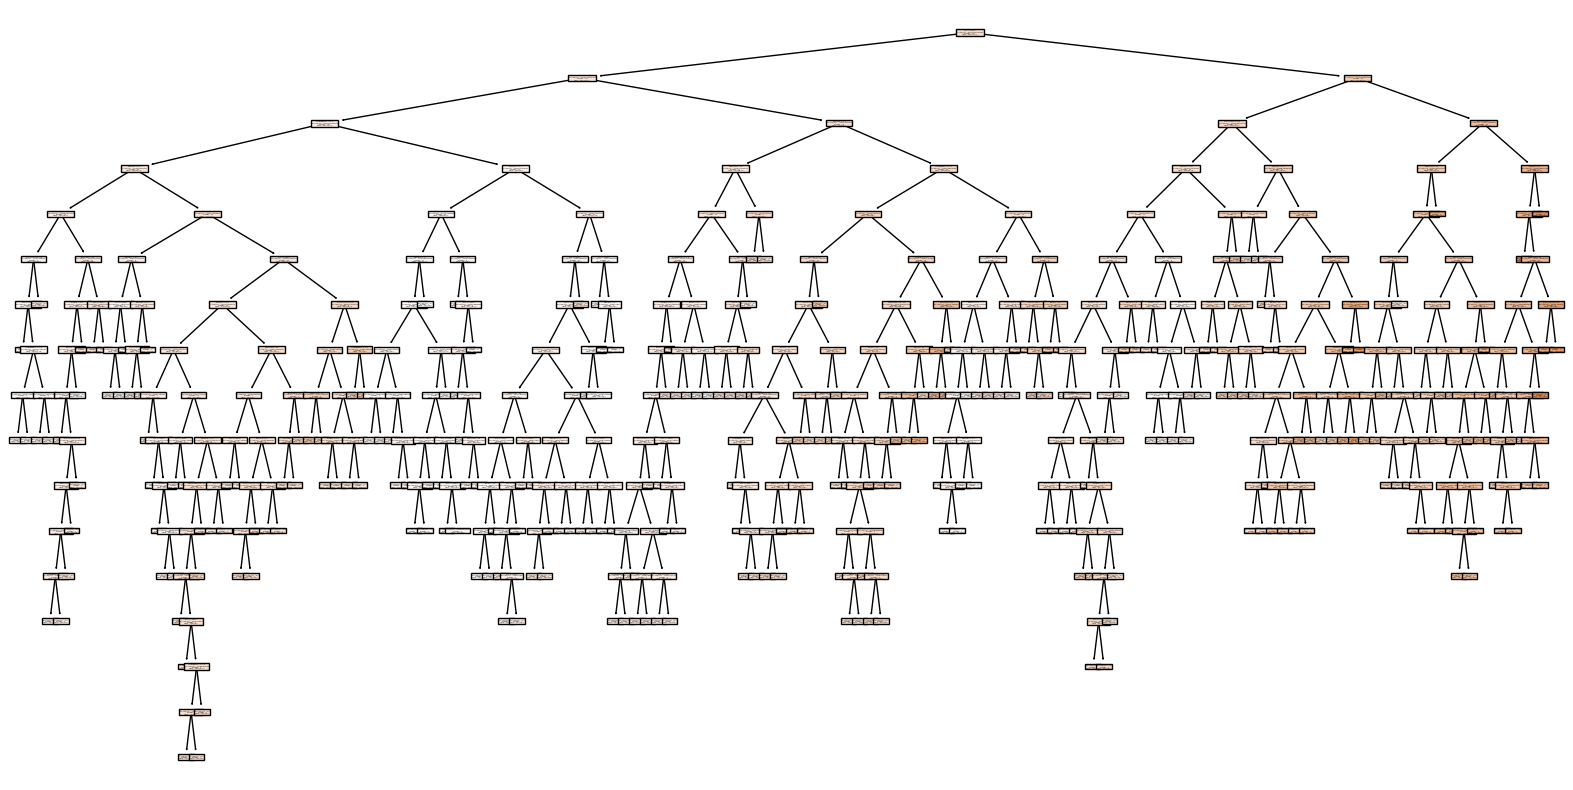

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)
plt.show()


These are a nightmare to read but some models have great visuals

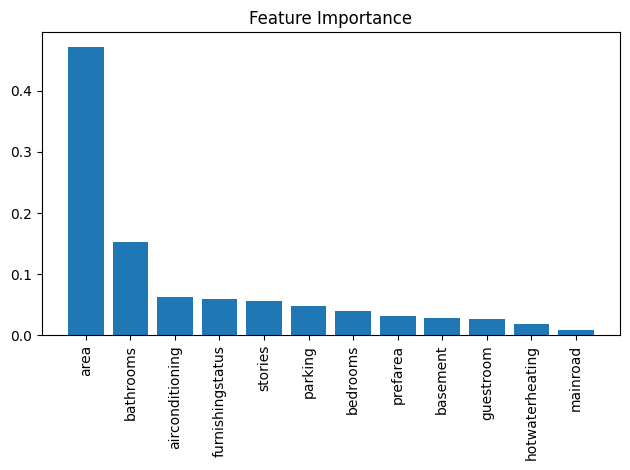

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

### Let's take away variables

In [ ]:
X_new = X.drop(columns=['mainroad', 'hotwaterheating','guestroom','basement','prefarea', ])  # Features
y = df['price']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [ ]:
results = []
models = {}
for name, reg in zip(names, Regressors):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o reg.fit(X_train, y_train)

    print ('... predicting')
    y_pred = reg.predict(X_test)

    print ('... scoring')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # save the results to dictionaries
    models[name] = reg

    results.append([name, mse, r2, run_time.best])

results = pd.DataFrame(results, columns=['Regressors', 'MSE', "R-Squared", 'Train Time'])
results.set_index('Regressors', inplace= True)

Fitting Decision model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring


In [ ]:
data = pd.DataFrame(results)
data = data.reset_index()
data.sort_values('R-Squared', ascending=False)

,Regressors,MSE,R-Squared,Train Time
1,Random Forest,1.337780e+12,0.535738,0.174557
0,Decision,2.811480e+12,0.024306,0.003605


### Observations

Previous model with all features

| Regressors |	MSE |	R-Squared	| Train Time |
|----------|----------|----------|-----|
|	Random Forest |	1.231146e+12	|0.572744	| 0.197813
|Decision	|2.549612e+12	|0.115185 |	0.002595

From this we can the random forest preferred more data points whilst the decision tree improved

### Bring back a previous dataset

In [ ]:
X_Encoded = pd.read_csv('X_encoded.csv')
X_Encoded.head(2)

,Unnamed: 0,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,furnishingstatus,guestroom_no,guestroom_yes,prefarea_no,prefarea_yes,category_mapped,category_encoded
0,0,7420.0,4,2,3,1,0,0,1,2,0,1,0,0,1,1.5,1
1,1,3450.0,4,4,4,1,0,0,1,3,0,1,0,1,0,1.5,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Encoded, y, test_size=0.2, random_state=0)

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(r2_score(y_test, y_pred))

0.9956466317584514


In [ ]:
feature_importance = dt.feature_importances_

# Create a DataFrame to display feature importance
df_importance = pd.DataFrame({'Feature': X_Encoded.columns, 'Importance': feature_importance})
df_importance.sort_values(by='Importance', ascending=False, inplace=True)

print(df_importance)

             Feature    Importance
0         Unnamed: 0  9.992599e-01
1               area  4.880021e-04
14      prefarea_yes  1.018994e-04
10  furnishingstatus  9.897129e-05
4            stories  2.042613e-05
7    hotwaterheating  9.562863e-06
12     guestroom_yes  6.707625e-06
8    airconditioning  5.742050e-06
2           bedrooms  2.369856e-06
9            parking  1.647352e-06
13       prefarea_no  1.068080e-06
15   category_mapped  9.155523e-07
11      guestroom_no  8.994900e-07
5           mainroad  7.170220e-07
6           basement  6.332409e-07
3          bathrooms  4.677348e-07
16  category_encoded  9.251897e-08


### Observation

Things that were insignificant are somewhat significnat again.

Welcome back to the black box. What we think we know can be changed in the background by changing the smallest of details.

EDA is critical to showcase understanding of the problem whilst post model evaluation becomes important when we look to sell a model

# Coding Challenge Tips and Tricks

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/AnalyseProject/world_population.csv', index_col='Country Code')
df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [ ]:
#Challenge 1 Divide and conquer
row = df.loc['AFG']
print(row)

1960     8996351.0
1961     9166764.0
1962     9345868.0
1963     9533954.0
1964     9731361.0
1965     9938414.0
1966    10152331.0
1967    10372630.0
1968    10604346.0
1969    10854428.0
1970    11126123.0
1971    11417825.0
1972    11721940.0
1973    12027822.0
1974    12321541.0
1975    12590286.0
1976    12840299.0
1977    13067538.0
1978    13237734.0
1979    13306695.0
1980    13248370.0
1981    13053954.0
1982    12749645.0
1983    12389269.0
1984    12047115.0
1985    11783050.0
1986    11601041.0
1987    11502761.0
1988    11540888.0
1989    11777609.0
1990    12249114.0
1991    12993657.0
1992    13981231.0
1993    15095099.0
1994    16172719.0
1995    17099541.0
1996    17822884.0
1997    18381605.0
1998    18863999.0
1999    19403676.0
2000    20093756.0
2001    20966463.0
2002    21979923.0
2003    23064851.0
2004    24118979.0
2005    25070798.0
2006    25893450.0
2007    26616792.0
2008    27294031.0
2009    28004331.0
2010    28803167.0
2011    29708599.0
2012    3069

In [ ]:
value = row.loc['2015']
print(value)

33736494.0


In [ ]:
custom = "2015"
Current = row.loc[custom]
Previous = row.loc[str(int(custom)-1)]
print(Current)
print(Previous)

33736494.0
32758020.0


Challenge 2 Alternating Rows
```python

row[0] % 2 != 0

X_test.append(row[0])
y_test.append(row[1])

else:
X and Y Train values
```

In [ ]:
#Challege 3 Reshaping
model = dt.fit(X_train.reshape(-1,1), y_train)

In [ ]:
#Challenge 4 Predict before you calculate
y_predict = model.predict(X_test.reshape(-1,1))

## Conclusion



#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>